# **Happy Deliveries Case Study Solutions**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

hd_customers = pd.read_excel('/content/hd_customers.xlsx')
hd_deliveries= pd.read_csv('/content/hd_delivery.csv')

In [ ]:
hd_deliveries.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED


In [ ]:
hd_customers.head()

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com
3,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com
4,1005,Carly,Armstrong,22,Mayo,CArmstrong@mail.com


In [ ]:
# CLEAN DATASET
# 1. Input errors may have resulted in errors in ‘customer’ dataset


hd_customers['age'].value_counts()

22     41
23     35
21     30
24     26
26     26
28     26
30     23
31     21
25     19
33     19
27     15
32     14
29     13
20     13
34     13
19     11
18      8
37      5
35      3
58      3
43      2
36      2
55      2
41      2
45      2
38      2
6       2
42      2
59      2
68      2
67      2
49      2
60      1
62      1
40      1
46      1
75      1
61      1
70      1
139     1
44      1
57      1
53      1
47      1
54      1
8       1
150     1
66      1
71      1
160     1
Name: age, dtype: int64

In [ ]:
hd_customers.loc[(hd_customers['age'] >= 80) | (hd_customers['age'] <= 10)]

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com
102,1103,Andrew,Craig,6,Dublin,Andrew.C74@yahoo.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


In [ ]:
hd_customers.isnull().sum()

id            0
first_name    0
last_name     0
age           0
city          0
email         0
dtype: int64

In [ ]:
hd_customers["city"].value_counts()

Dublin       168
Galway        48
Kerry         48
Limerick      46
Sligo         24
Mayo          24
Waterford     24
Meath         21
Leitrim        3
Name: city, dtype: int64

<Axes: >

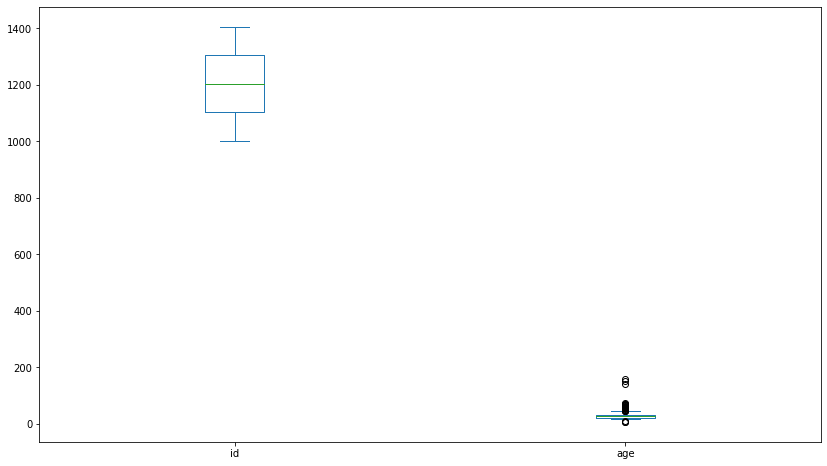

In [ ]:
# Task 2: Data Cleaning

# name_of_data.plot(kind = "box", figsize = (x,y))

hd_customers.plot(kind="box", figsize=(14,8))

# ZOOM IN
# hd_customers["age"].plot(kind="box", figsize=(14,8))

<Axes: >

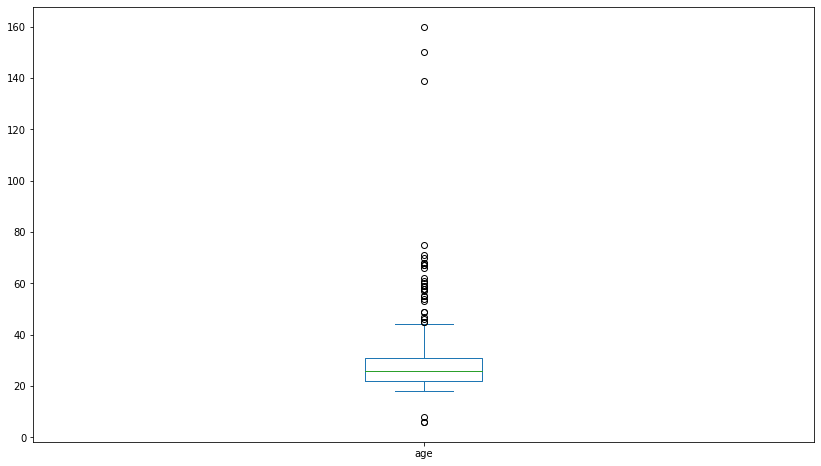

In [ ]:
hd_customers["age"].plot(kind="box", figsize=(14,8))

In [ ]:
hd_customers.loc[hd_customers['age'] < 18]

# FOR COMPARISON
# hd_customers.loc[hd_customers['age'] < min_threshold]

,id,first_name,last_name,age,city,email
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
102,1103,Andrew,Craig,6,Dublin,Andrew.C74@yahoo.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


In [ ]:

hd_customers.loc[hd_customers['age'] > 100]

# FOR COMPARISON
# hd_customers.loc[hd_customers['age'] > max_threshold]

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com


In [ ]:
customers_clean = hd_customers.loc[(hd_customers['age'] > 18) & (hd_customers['age'] < 100)]

In [ ]:
customers_clean["age"].describe()

count    392.000000
mean      28.839286
std        9.732861
min       19.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       75.000000
Name: age, dtype: float64

In [ ]:
# hd_customers
hd_customers.isnull().sum()

id            0
first_name    0
last_name     0
age           0
city          0
email         0
dtype: int64

In [ ]:
### Outliers

#hd_deliveries
hd_deliveries.describe()

,order_id,driver_id,restaurant_id,cust_id,order_total,discount_pc
count,998.000000,998.000000,998.000000,998.000000,998.000000,92.000000
mean,100499.500000,220.905812,107.080160,1174.692385,27.141994,17.717391
std,288.242086,103.302737,96.580998,117.393134,10.927458,4.220114
min,100001.000000,7.000000,2.000000,1001.000000,8.160000,10.000000
25%,100250.250000,144.000000,20.000000,1062.250000,19.540000,20.000000
50%,100499.500000,224.000000,82.000000,1172.000000,26.415000,20.000000
75%,100748.750000,312.750000,188.000000,1276.000000,34.207500,20.000000
max,100998.000000,434.000000,383.000000,1406.000000,107.030000,20.000000


In [ ]:
#hd_customers
hd_customers.describe()

# We can see some ages very high and very low, likely to be an error by user when inputting their details.

,id,age
count,406.000000,406.000000
mean,1203.500000,29.354680
std,117.346353,14.347274
min,1001.000000,6.000000
25%,1102.250000,22.000000
50%,1203.500000,26.000000
75%,1304.750000,31.000000
max,1406.000000,160.000000


In [ ]:
def plot_boxplot(df, ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show()

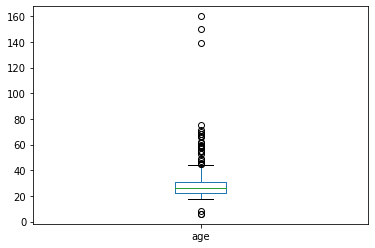

In [ ]:
plot_boxplot(hd_customers, 'age')

In [ ]:
hd_customers['age'].quantile(0.75)

31.0

In [ ]:
# Removing outliers
min_threshold, max_threshold = hd_customers['age'].quantile([0.006, 0.994])
min_threshold, max_threshold

(12.3, 111.4800000000032)

In [ ]:
hd_customers[hd_customers['age'] < min_threshold]

,id,first_name,last_name,age,city,email
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
102,1103,Andrew,Craig,6,Dublin,Andrew.C74@yahoo.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


In [ ]:
hd_customers[hd_customers['age'] > max_threshold]

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com


In [ ]:
# THRESHOLD 1
min_threshold, max_threshold = hd_customers['age'].quantile([0.006, 0.994])
min_threshold, max_threshold

threshold_1 = hd_customers[(hd_customers['age'] < max_threshold) & (hd_customers['age'] > min_threshold)]

In [ ]:
threshold_1.describe()

,id,age
count,400.000000,400.000000
mean,1205.475000,28.622500
std,116.924496,9.753863
min,1002.000000,18.000000
25%,1105.750000,22.000000
50%,1206.500000,26.000000
75%,1306.250000,31.000000
max,1406.000000,75.000000


In [ ]:
# THRESHOLD 2
min_threshold, max_threshold = hd_customers['age'].quantile([0.001, 0.999])
min_threshold, max_threshold

threshold_2 = hd_customers[(hd_customers['age'] < max_threshold) & (hd_customers['age'] > min_threshold)]

In [ ]:
threshold_2.describe()

,id,age
count,403.000000,403.000000
mean,1204.173697,29.146402
std,117.473357,12.734405
min,1001.000000,8.000000
25%,1103.000000,22.000000
50%,1205.000000,26.000000
75%,1305.500000,31.000000
max,1406.000000,150.000000


In [ ]:
# Removing outliers
min_threshold, max_threshold = hd_customers['age'].quantile([0.006, 0.994])
min_threshold, max_threshold

customers_df = hd_customers[(hd_customers['age'] < max_threshold) & (hd_customers['age'] > min_threshold)]

In [ ]:
customers_df.describe()

,id,age
count,400.000000,400.000000
mean,1205.475000,28.622500
std,116.924496,9.753863
min,1002.000000,18.000000
25%,1105.750000,22.000000
50%,1206.500000,26.000000
75%,1306.250000,31.000000
max,1406.000000,75.000000


In [ ]:
# NOT USEFUL FOR OUR ANALYSIS USE OTHER METHOD
# v_name = df["col_name"]  .quantile(0.25)
q1 = hd_customers['age'].quantile(0.25)
q3 = hd_customers['age'].quantile(0.75)

IQR = q3 - q1
IQR

# Same code written

other_method = hd_customers[~((hd_customers['age'] < (q1 - 1.5 * IQR)) | (hd_customers['age'] > (q3 + 1.5 * IQR)))]

In [ ]:
other_method["age"].describe()

count    373.000000
mean      26.453083
std        5.205051
min       18.000000
25%       22.000000
50%       26.000000
75%       30.000000
max       44.000000
Name: age, dtype: float64

<Axes: >

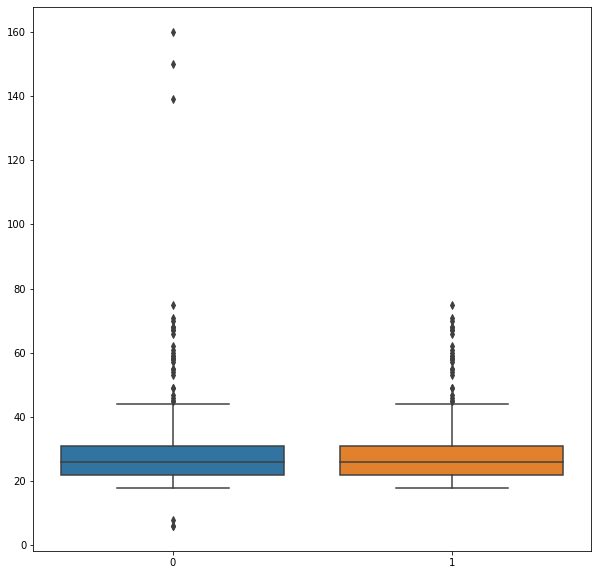

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=[hd_customers['age'], customers_df['age']])

In [ ]:
customers_df.describe()

,id,age
count,400.000000,400.000000
mean,1205.475000,28.622500
std,116.924496,9.753863
min,1002.000000,18.000000
25%,1105.750000,22.000000
50%,1206.500000,26.000000
75%,1306.250000,31.000000
max,1406.000000,75.000000


In [ ]:
# 2. Actual payment for order needs to be calculated from the ‘delivery’ dataset
hd_deliveries.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'cust_id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status'],
      dtype='object')

In [ ]:
hd_deliveries.head(20)

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED
5,100006,15/08/2021 18:15,15/08/2021 18:45,154,83,1025,Cork,False,NaN,46.88,NaN,COMPLETED
6,100007,27/08/2021 19:18,27/08/2021 19:48,160,194,1028,Cork,False,NaN,46.78,NaN,COMPLETED
7,100008,18/12/2021 18:52,18/12/2021 19:19,60,83,1013,Dublin,False,NaN,46.67,NaN,COMPLETED
8,100009,17/11/2021 19:30,17/11/2021 19:57,172,228,1017,Dublin,False,NaN,46.56,NaN,COMPLETED
9,100010,29/05/2021 17:09,29/05/2021 17:36,373,9,1019,Dublin,False,NaN,46.40,NaN,COMPLETED


In [ ]:
hd_deliveries.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      7
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          906
order_total              0
discount_pc            906
status                   0
dtype: int64

In [ ]:
hd_deliveries['discount_pc'] = hd_deliveries['discount_pc'].fillna(0)

In [ ]:
hd_deliveries["discount_pc"].isnull().sum()

0

In [ ]:
hd_deliveries["payment_received"] = hd_deliveries["order_total"] - (hd_deliveries["order_total"] * hd_deliveries["discount_pc"])/100
hd_deliveries.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,0.0,COMPLETED,69.400
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,0.0,COMPLETED,47.160
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,0.0,COMPLETED,47.150
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,0.0,COMPLETED,47.000


In [ ]:
hd_deliveries.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,0.0,COMPLETED,69.400
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,0.0,COMPLETED,47.160
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,0.0,COMPLETED,47.150
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,0.0,COMPLETED,47.000


In [ ]:
# delivery_df['actual_payment'] = delivery_df['order_total'] - (delivery_df['order_total'] * (delivery_df['discount_pc']/100))

In [ ]:
# 3. Orders with the status ‘CANCELLED’ payments should be removed from sales since they had to be refunded (already done)

In [ ]:
hd_deliveries.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      7
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          906
order_total              0
discount_pc              0
status                   0
payment_received         0
dtype: int64

In [ ]:
hd_deliveries = hd_deliveries.loc[hd_deliveries["status"]=="COMPLETED"]
hd_deliveries.status.value_counts()

COMPLETED    991
Name: status, dtype: int64

In [ ]:
# ANOTHER METHOD IF SEE DELIVERED TIMESTAMP NULL, REMOVING ENTRIES WITH NULL

In [ ]:
# Nulls
# hd_deliveries
hd_deliveries.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      0
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          899
order_total              0
discount_pc              0
status                   0
payment_received         0
dtype: int64

In [ ]:
hd_deliveries['discount_applied'].value_counts()

False    899
True      92
Name: discount_applied, dtype: int64

In [ ]:
hd_deliveries['discount_pc'].value_counts()

0.0     899
20.0     71
10.0     21
Name: discount_pc, dtype: int64

In [ ]:
#  Remove
hd_deliveries[hd_deliveries['delivered_timestamp'].isnull()]

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received


In [ ]:
dt_null = hd_deliveries['delivered_timestamp'].isnull()
deliveries_df = hd_deliveries.loc[~dt_null,:]

In [ ]:
deliveries_df.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      0
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          899
order_total              0
discount_pc              0
status                   0
payment_received         0
dtype: int64

In [ ]:
hd_deliveries.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'cust_id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status',
       'payment_received'],
      dtype='object')

In [ ]:
hd_customers.columns

# customers - id => deliveries - cust_id

Index(['id', 'first_name', 'last_name', 'age', 'city', 'email'], dtype='object')

In [ ]:
# JOINING THE DATASETS

# customers dataset -> id => deliveries dataset -> cust_id

hd_customers = hd_customers.rename(columns={"id":"cust_id"})

In [ ]:
# JOINING THE DATASETS

# METHOD 1 RENAME
# customers dataset -> id => deliveries dataset -> cust_id

hd_customers = hd_customers.rename(columns={"id":"cust_id"})

inner_join = pd.merge(hd_customers, hd_deliveries, on = "cust_id", how = "inner")

## METHOD 2:

merged = pd.merge(hd_deliveries, customers_df, left_on = 'cust_id', right_on = 'id', how = 'inner')
merged

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received,id,first_name,last_name,age,city,email
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,05/06/2021 20:38,05/06/2021 21:08,351,140,1016,Dublin,False,NaN,16.55,0.0,COMPLETED,16.550,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,30/04/2022 21:03,30/04/2022 21:39,175,48,1016,Dublin,False,NaN,46.62,0.0,COMPLETED,46.620,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,02/11/2022 19:15,02/11/2022 19:49,168,321,1016,Galway,False,NaN,26.66,0.0,COMPLETED,26.660,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,0.0,COMPLETED,69.400,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,100963,17/12/2022 20:39,17/12/2022 21:15,279,109,1200,Kerry,False,NaN,36.42,0.0,COMPLETED,36.420,1200,Courtney,White,22,Dublin,CourtneyWhite51@mail.com
968,100967,20/12/2022 20:39,20/12/2022 21:15,365,89,1248,Sligo,False,NaN,34.17,0.0,COMPLETED,34.170,1248,Jamie,Alexander,21,Galway,Jamie.A83@yahoo.com
969,100974,23/12/2022 17:05,23/12/2022 17:41,99,83,1149,Kerry,False,NaN,39.50,0.0,COMPLETED,39.500,1149,Joseph,Smith,24,Dublin,JosephSmith@yahoo.com
970,100978,24/12/2022 21:28,24/12/2022 22:10,163,10,1188,Sligo,False,NaN,37.21,0.0,COMPLETED,37.210,1188,Christine,Irwin,23,Dublin,ChristineIrwin51@outlook.com


In [ ]:
inner_join.head()

,cust_id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com,100728,04/10/2022 18:49,04/10/2022 19:22,98,62,Dublin,False,NaN,20.12,0.0,COMPLETED,20.12
1,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com,100802,14/11/2022 18:44,14/11/2022 19:18,371,66,Galway,False,NaN,16.82,0.0,COMPLETED,16.82
2,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100404,12/01/2022 18:16,12/01/2022 18:49,200,47,Dublin,False,NaN,20.63,0.0,COMPLETED,20.63
3,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100674,17/08/2022 17:55,17/08/2022 18:28,254,9,Dublin,False,NaN,22.26,0.0,COMPLETED,22.26
4,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100622,14/07/2022 21:45,14/07/2022 22:21,77,5,Cork,False,NaN,28.24,0.0,COMPLETED,28.24


In [ ]:
## METHOD 1: example changing name

other_example = hd_deliveries.rename(columns={'cust_id': 'id'})

In [ ]:
## example changing name

other_example.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status',
       'payment_received'],
      dtype='object')

In [ ]:
## example changing name

example_merge = pd.merge(other_example, customers_df, on = 'id', how = 'inner')
example_merge

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received,first_name,last_name,age,city,email
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,05/06/2021 20:38,05/06/2021 21:08,351,140,1016,Dublin,False,NaN,16.55,0.0,COMPLETED,16.550,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,30/04/2022 21:03,30/04/2022 21:39,175,48,1016,Dublin,False,NaN,46.62,0.0,COMPLETED,46.620,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,02/11/2022 19:15,02/11/2022 19:49,168,321,1016,Galway,False,NaN,26.66,0.0,COMPLETED,26.660,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,0.0,COMPLETED,69.400,Mr.,Joseph,23,Limerick,MHorne@zoho.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,100963,17/12/2022 20:39,17/12/2022 21:15,279,109,1200,Kerry,False,NaN,36.42,0.0,COMPLETED,36.420,Courtney,White,22,Dublin,CourtneyWhite51@mail.com
968,100967,20/12/2022 20:39,20/12/2022 21:15,365,89,1248,Sligo,False,NaN,34.17,0.0,COMPLETED,34.170,Jamie,Alexander,21,Galway,Jamie.A83@yahoo.com
969,100974,23/12/2022 17:05,23/12/2022 17:41,99,83,1149,Kerry,False,NaN,39.50,0.0,COMPLETED,39.500,Joseph,Smith,24,Dublin,JosephSmith@yahoo.com
970,100978,24/12/2022 21:28,24/12/2022 22:10,163,10,1188,Sligo,False,NaN,37.21,0.0,COMPLETED,37.210,Christine,Irwin,23,Dublin,ChristineIrwin51@outlook.com


In [ ]:
hd_deliveries = hd_deliveries.rename(columns={'id': 'cust_id'})

In [ ]:
hd_deliveries["cust_id"].nunique()

405

In [ ]:
customers_df["id"].nunique()

400

In [ ]:
merged["id"].nunique()

399

In [ ]:
## METHOD 2:

merged = pd.merge(hd_deliveries, customers_df, left_on = 'cust_id', right_on = 'id', how = 'inner')
merged

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received,id,first_name,last_name,age,city,email
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,05/06/2021 20:38,05/06/2021 21:08,351,140,1016,Dublin,False,NaN,16.55,0.0,COMPLETED,16.550,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,30/04/2022 21:03,30/04/2022 21:39,175,48,1016,Dublin,False,NaN,46.62,0.0,COMPLETED,46.620,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,02/11/2022 19:15,02/11/2022 19:49,168,321,1016,Galway,False,NaN,26.66,0.0,COMPLETED,26.660,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,0.0,COMPLETED,69.400,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,100963,17/12/2022 20:39,17/12/2022 21:15,279,109,1200,Kerry,False,NaN,36.42,0.0,COMPLETED,36.420,1200,Courtney,White,22,Dublin,CourtneyWhite51@mail.com
968,100967,20/12/2022 20:39,20/12/2022 21:15,365,89,1248,Sligo,False,NaN,34.17,0.0,COMPLETED,34.170,1248,Jamie,Alexander,21,Galway,Jamie.A83@yahoo.com
969,100974,23/12/2022 17:05,23/12/2022 17:41,99,83,1149,Kerry,False,NaN,39.50,0.0,COMPLETED,39.500,1149,Joseph,Smith,24,Dublin,JosephSmith@yahoo.com
970,100978,24/12/2022 21:28,24/12/2022 22:10,163,10,1188,Sligo,False,NaN,37.21,0.0,COMPLETED,37.210,1188,Christine,Irwin,23,Dublin,ChristineIrwin51@outlook.com


In [ ]:
merged.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'cust_id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status',
       'payment_received', 'id', 'first_name', 'last_name', 'age', 'city',
       'email'],
      dtype='object')

In [ ]:
merged.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,payment_received,id,first_name,last_name,age,city,email
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,05/06/2021 20:38,05/06/2021 21:08,351,140,1016,Dublin,False,NaN,16.55,0.0,COMPLETED,16.550,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,30/04/2022 21:03,30/04/2022 21:39,175,48,1016,Dublin,False,NaN,46.62,0.0,COMPLETED,46.620,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,02/11/2022 19:15,02/11/2022 19:49,168,321,1016,Galway,False,NaN,26.66,0.0,COMPLETED,26.660,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,0.0,COMPLETED,69.400,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com


# Task 4:

### Question 1

Compare monthly 2021 sales to 2022 and determine has ‘Happy Deliveries’ sales growth

In [ ]:
merged.dtypes

order_id                 int64
order_timestamp         object
delivered_timestamp     object
driver_id                int64
restaurant_id            int64
cust_id                  int64
delivery_region         object
discount_applied          bool
discount_code           object
order_total            float64
discount_pc            float64
status                  object
payment_received       float64
id                       int64
first_name              object
last_name               object
age                      int64
city                    object
email                   object
dtype: object

In [ ]:
# STEP 1 =  Convert date to correct datatype
merged['delivered_timestamp'] = pd.to_datetime(merged['delivered_timestamp'])
merged['order_timestamp'] = pd.to_datetime(merged['order_timestamp'])

In [ ]:
# STEP 2 =  Extract date and create columns for month and year
merged['year'] = merged["order_timestamp"].dt.year
merged['month'] = merged["order_timestamp"].dt.month

In [ ]:
# STEP 3
sales_2021 =merged.loc[merged["year"] == 2021]
sales_2022 =merged.loc[merged["year"] == 2022]

In [ ]:
sales_2022.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,payment_received,id,first_name,last_name,age,city,email,year,month
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,NaN,46.62,...,COMPLETED,46.62,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2022,4
3,100753,2022-02-11 19:15:00,2022-02-11 19:49:00,168,321,1016,Galway,False,NaN,26.66,...,COMPLETED,26.66,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2022,2
9,100827,2022-11-20 17:02:00,2022-11-20 17:36:00,273,8,1017,Galway,False,NaN,21.66,...,COMPLETED,21.66,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com,2022,11
13,100493,2022-04-24 18:23:00,2022-04-24 18:59:00,203,225,1019,Cork,False,NaN,30.28,...,COMPLETED,30.28,1019,Andre,Chang,34,Dublin,Andre_Chang34@att.com,2022,4
14,100741,2022-10-23 17:40:00,2022-10-23 18:13:00,365,7,1019,Dublin,False,NaN,30.41,...,COMPLETED,30.41,1019,Andre,Chang,34,Dublin,Andre_Chang34@att.com,2022,10


In [ ]:
sales_2021.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'cust_id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status',
       'payment_received', 'id', 'first_name', 'last_name', 'age', 'city',
       'email', 'year', 'month'],
      dtype='object')

In [ ]:
# STEP 3 = Split the years required for comparison
monthly_21 = sales_2021.groupby('month')['payment_received'].sum().to_frame('Amount')
monthly_22 = sales_2022.groupby('month')['payment_received'].sum().to_frame('Amount')

In [ ]:
monthly_21.head()

,Amount
month,
1,274.540
2,551.460
3,702.804
4,866.450
5,808.777


Text(0, 0.5, 'Sales')

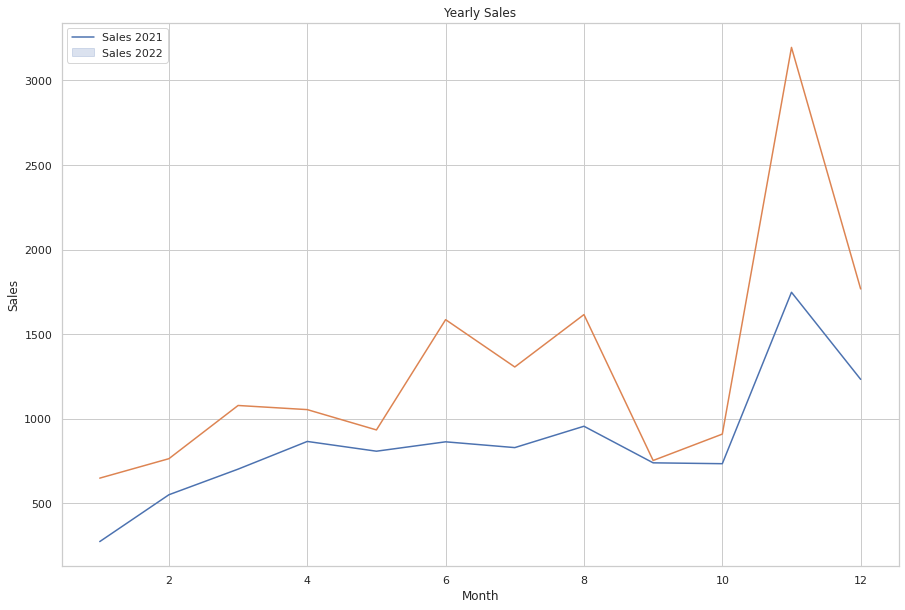

In [ ]:
fig = plt.figure(figsize=(15,10))

# Adding labels
labels = ["Sales 2021", "Sales 2022"]

sns.set(style="whitegrid")

ax = sns.lineplot(data = monthly_21, x='month', y='Amount', label='2021')
ax = sns.lineplot(data = monthly_22, x='month', y='Amount', label='2022')

plt.legend(labels)

ax.set_title('Yearly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')

In [ ]:
merged["order_timestamp"] = pd.to_datetime(merged["order_timestamp"])
merged["year"] = merged["order_timestamp"].dt.year
merged["month"] = merged["order_timestamp"].dt.month

In [ ]:
merged.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,payment_received,id,first_name,last_name,age,city,email,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,11
1,100328,2021-05-06 20:38:00,2021-05-06 21:08:00,351,140,1016,Dublin,False,NaN,16.55,...,COMPLETED,16.550,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,5
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,NaN,46.62,...,COMPLETED,46.620,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2022,4
3,100753,2022-02-11 19:15:00,2022-02-11 19:49:00,168,321,1016,Galway,False,NaN,26.66,...,COMPLETED,26.660,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2022,2
4,100002,2021-11-07 21:23:00,2021-11-07 21:53:00,43,219,1017,Cork,False,NaN,69.40,...,COMPLETED,69.400,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com,2021,11


In [ ]:
# Filter 2 dfs
df_2021 = merged.loc[merged["year"] == 2021]
df_2022 = merged.loc[merged["year"] == 2022]

In [ ]:
df_2021["year"].value_counts()

2021    389
Name: year, dtype: int64

In [ ]:
df_2022["year"].value_counts()

2022    583
Name: year, dtype: int64

In [ ]:
# Get total sales by month
sales_21 = df_2021.groupby('month')['payment_received'].sum().to_frame('msales_21')
sales_22 = df_2022.groupby('month')['payment_received'].sum().to_frame('msales_22')

In [ ]:
sales_21

,msales_21
month,
1,274.540
2,551.460
3,702.804
4,866.450
5,808.777
6,864.224
7,830.050
8,956.254
9,740.040


In [ ]:
sales_22

,msales_22
month,
1,649.590
2,764.568
3,1079.000
4,1054.559
5,934.479
6,1586.253
7,1306.518
8,1616.162
9,753.830


Text(0, 0.5, 'Sales (€)')

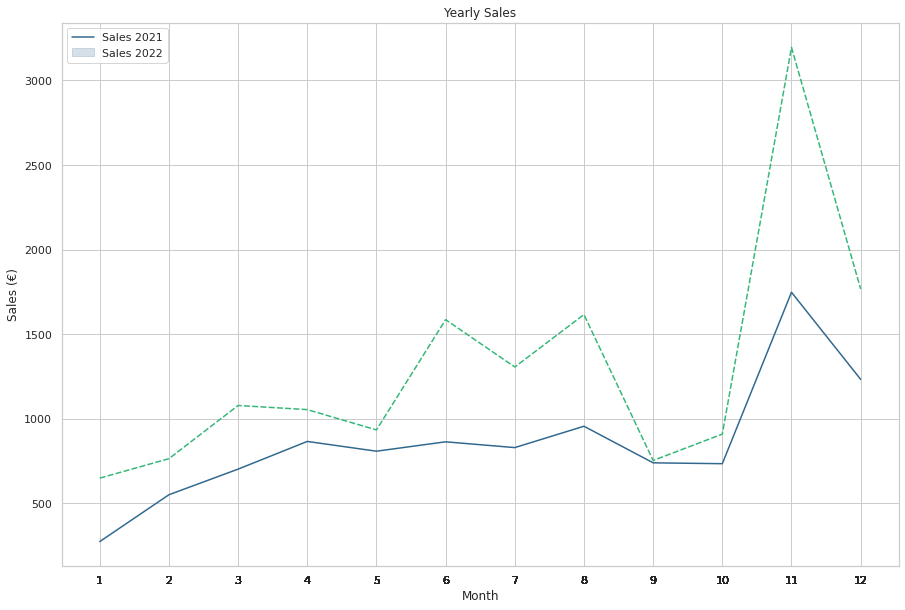

In [ ]:
# Graph with both graphs together, and code
fig = plt.figure(figsize=(15,10))
labels = ["Sales 2021", "Sales 2022"]

sns.set(style="whitegrid")
ax = sns.lineplot(data = [sales_21['msales_21'], sales_22['msales_22']], palette = 'viridis')
plt.legend(labels)
plt.xticks(df_2021['month'])
ax.set_title('Yearly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Sales (€)')

Text(0, 0.5, 'Sales (€)')

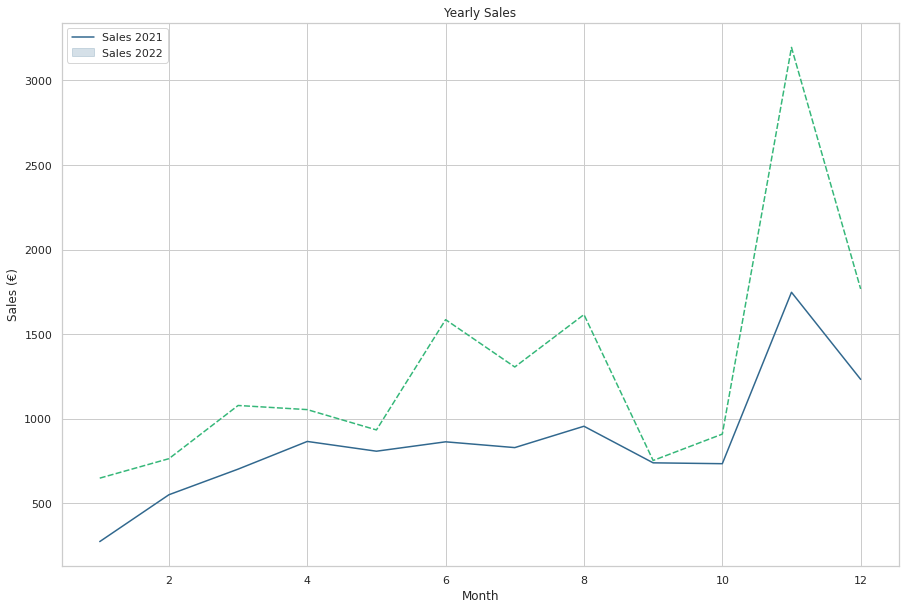

In [ ]:
# Graph with both graphs together, and code
fig = plt.figure(figsize=(15,10))
labels = ["Sales 2021", "Sales 2022"]

sns.set(style="whitegrid")
ax = sns.lineplot(data = [sales_21['msales_21'], sales_22['msales_22']], palette = 'viridis')

plt.legend(labels)

 # plt.xticks(sales_2021['month']) # Why do I have to put in this line of code to refer to 2021 df
ax.set_title('Yearly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Sales (€)')

Text(0, 0.5, 'Sales (€)')

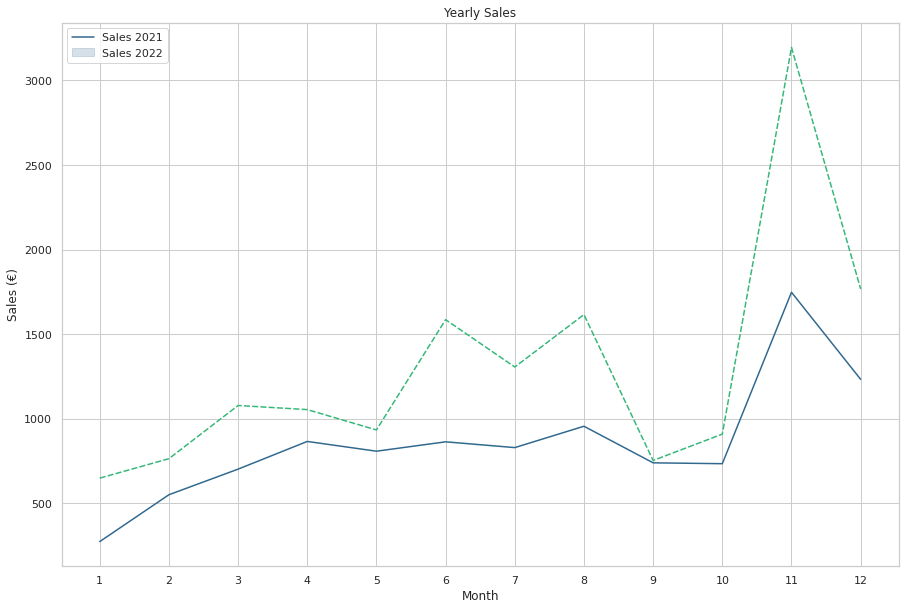

In [ ]:
# Graph with both graphs together, and code
fig = plt.figure(figsize=(15,10))
labels = ["Sales 2021", "Sales 2022"]

# X LABELS FROM LIST
# IF USING LIST OF NAMES
labels_x = [1,2,3,4,5,6,7,8,9,10,11,12]

sns.set(style="whitegrid")
ax = sns.lineplot(data = [sales_21['msales_21'], sales_22['msales_22']], palette = 'viridis')

plt.legend(labels)

# PLT.XTICK(LIST_LABELS)
plt.xticks(labels_x) # Why do I have to put in this line of code to refer to 2021 df
# For comparison
# plt.xticks(sales_2021["Month"])
ax.set_title('Yearly Sales')
ax.set_xlabel('Month')
ax.set_ylabel('Sales (€)')

In [ ]:
sales_2021["month"].value_counts()

11    64
12    46
8     36
4     32
6     32
7     31
5     29
9     29
3     28
10    27
2     22
1     13
Name: month, dtype: int64

### Question 2

Looking to the loyalty card holders, what is the age distribution of those customers?

In [ ]:
customers_df.head(1)

,id,first_name,last_name,age,city,email
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com


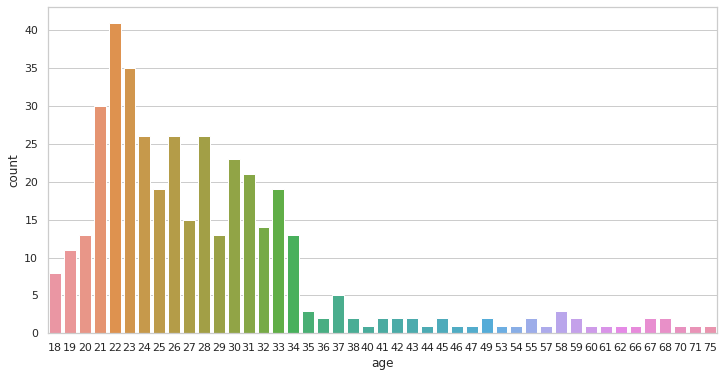

In [ ]:
plt.figure(figsize=(12,6))

ax = sns.countplot(data = customers_df, x= "age")

In [ ]:
merged["age"].value_counts()

22    102
23     85
31     74
28     69
26     63
24     57
21     57
30     55
33     51
25     43
32     38
20     33
34     32
27     32
29     26
19     24
18     20
59     10
58      9
68      8
35      7
37      7
67      6
42      6
44      5
45      5
66      4
43      4
41      4
49      4
55      3
46      3
47      3
71      3
54      3
36      2
75      2
40      2
60      2
70      2
62      2
38      2
61      1
57      1
53      1
Name: age, dtype: int64

In [ ]:
# lib_np.arange(start, stop, step)
np.arange(10,80,2)

In [ ]:
# MEDIAN / MEAN / MODE
customers_df['age'].median(), customers_df['age'].mean(), customers_df['age'].mode()

Text(0, 0.5, 'Number of Customers')

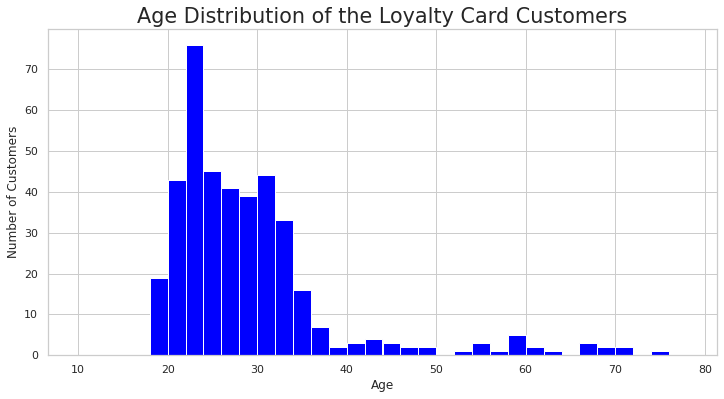

In [ ]:
# import numpy as np
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.hist(customers_df['age'], bins = np.arange(10,80,2), color = 'blue')
ax.set_title('Age Distribution of the Loyalty Card Customers', fontweight ='ultralight', fontsize = 'xx-large')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Customers')

In [ ]:

plt.figure(figsize=(20, 10))

sns.countplot(customers_df["age"])



KeyError: ignored

<Figure size 1440x720 with 0 Axes>

### Question 3

Is there a relationship between the total amount spend by a loyalty card holder and their age?

In [ ]:
merged.groupby(['cust_id','age'])['payment_received'].sum()

cust_id  age
1002     33     42.89
1003     23     38.16
1004     29     49.09
1005     22     66.98
1006     26     40.38
                ...  
1402     27     24.92
1403     28     24.71
1404     55     24.63
1405     24     24.49
1406     22     24.49
Name: payment_received, Length: 399, dtype: float64

In [ ]:
# Group together
amount_spent = merged.groupby(['cust_id','age'])['payment_received'].sum().to_frame('cust_total')

In [ ]:
# Group together
amount_spent = merged.groupby(['cust_id','age'])['payment_received'].sum().to_frame('cust_total')

amount_spent.reset_index(inplace = True)

Text(0.5, 1.0, 'Age vs. Actual Payment')

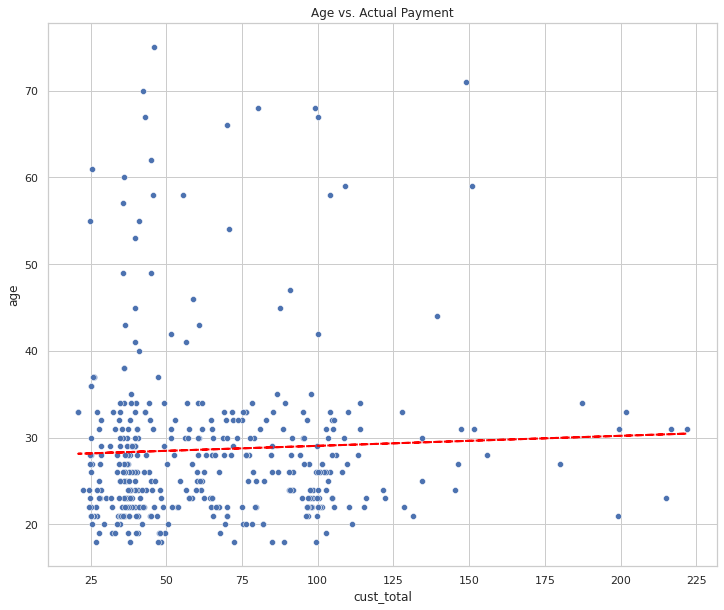

In [ ]:
# spend_age = merged[["age","payment_received"]]

plt.figure(figsize=(12, 10))
ax = sns.scatterplot(data = amount_spent, x = amount_spent["cust_total"], y=amount_spent["age"])

# LINE OF BEST FIT
x = amount_spent["cust_total"]
y = amount_spent["age"]


a, b = np.polyfit(x,y , 1)
ax.plot(x, a*x+b,  color='red', linestyle='--', linewidth=2)

plt.title('Age vs. Actual Payment')

In [ ]:
# EXAMPLE OF PERFECT FIT
# NOT GOOD ANALYSIS
# EXAMPLE FOR COMPARISON


plt.figure(figsize=(12, 10))
ax = sns.scatterplot(data = amount_spent, x = amount_spent["age"], y= amount_spent["age"])


x = amount_spent["age"]
y = amount_spent["age"]

# LINE OF BEST FIT

a, b = np.polyfit(x,y , 1)
ax.plot(x, a*x+b,  color='red', linestyle='--', linewidth=2)

NameError: ignored

<Figure size 864x720 with 0 Axes>

In [ ]:
# x = amount_spent["cust_total"]
# y = amount_spent["age"]
# CORRELATION COFF

compare_one = amount_spent[['cust_total','age']]

compare_one.corr(method = 'pearson')

In [ ]:
# HEATMAP OF ALL VARIABLES

cor_delivery = merged.corr()

plt.figure(figsize=(13, 6))

sns.heatmap(data = cor_delivery, vmax=1, annot=True, linewidths=.5)

plt.xticks(rotation=30, horizontalalignment='right')

plt.show()

In [ ]:
merged["discount_code"].value_counts()

In [ ]:
amount_spent.head()

In [ ]:
amount_spent.columns

### Question 4

Is there a relationship between the amount of a payment, the age of a person and whether or not they used discount codes (HINT: scatterplot with 3 layers )

In [ ]:
amount_spent_code = merged[['order_id','age','discount_applied','payment_received']]

In [ ]:
# STEP 1: SCATTERPLOT OF DISCOUNT APPLIED TRUE / FALSE

# ax = sns.scatterplot(x='cust_total', y = 'age', data = amount_spent)

fig = plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.scatterplot(x='payment_received', y = 'age', data = amount_spent_code, hue = 'discount_applied')
ax.set_title('Amount Spent Vs Age', fontweight ='ultralight', fontsize = 'xx-large')
ax.set_xlabel('Amount Spent')
ax.set_ylabel('Age')

In [ ]:
# STEP 2: SCATTERPLOT OF ACTUAL DISCOUNTS APPLIED

plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="age", y="payment_received", hue="discount_code",data=merged)

ax.set_title('Amount Spent Vs Age', fontweight ='ultralight', fontsize = 'xx-large')
ax.set_xlabel('Amount Spent')
ax.set_ylabel('Age')

### Question 5

Compare the sales for 2022 across all regions.

In [ ]:
# 2022 only
df_2022.head()

In [ ]:
df_2022["delivery_region"].value_counts()

In [ ]:
df_2022.groupby('delivery_region')['payment_received'].sum().to_frame("name")

In [ ]:
regions_sales = df_2022.groupby('delivery_region')['payment_received'].sum().to_frame('region_sales_22').sort_values(by='region_sales_22', ascending = False)

In [ ]:
regions_sales.columns

In [ ]:
regions_sales.reset_index(inplace = True)

In [ ]:
regions_sales.columns

In [ ]:
regions_sales.columns

In [ ]:
# STEP 1 CALCULATE TOTAL SALES PER REGION
# regions_sales = df_2022.groupby('delivery_region')['payment_received'].sum().to_frame('region_sales_22').sort_values(by='region_sales_22', ascending = False)

# STEP 2 GRAPH THE REGIONS BY TOTAL SALES IN A BAR PLOT
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(style="darkgrid")
sns.barplot(data = regions_sales, x = regions_sales["delivery_region"], y =regions_sales["region_sales_22"], palette = "Spectral")
ax.set_title('Region Sales 2022', fontweight ='bold')
ax.set_xlabel('Delivery Region')
ax.set_ylabel('Sales (€)')

# Task 5:

### Question 6

Christmas is coming and Happy Deliveries want to reward their high spending customers. Who are the top 10 highest spending customers in 2022?
Find their ID, name and email address for the marketing department to contact them with a reward.

In [ ]:
df_2022.head()

In [ ]:
# Get the total spent
top_cust_22 = df_2022.groupby('cust_id')['payment_received'].sum().to_frame('total_spent').sort_values(by = 'total_spent', ascending = False).reset_index()

In [ ]:
top_cust_22.head()

In [ ]:
# GET TOTAL SPENT BY GROUPING

# .head(n), if you don't suspect ties in ranking
top_cust_22 = df_2022.groupby('cust_id')['payment_received'].sum().to_frame('total_spent').sort_values(by = 'total_spent', ascending = False).reset_index().head(10)

# INCASE YOU SUSPECT TIES IN OUTPUT YOU CAN APPLY A RANK
# MIN RANK SKIPS TIES
# RANK()

# WHOLE NUMBERS WITH LIKELYHOOD OF TIES

# ADDING EXTRA COLUMN CALLED 'rank_min'

# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
top_cust_22['rank_min'] = top_cust_22['total_spent'].rank(method = 'min', ascending = False)



# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
# DENSE RANK DOES NOT SKIPS TIES
# DENSE_RANK
top_cust_22['rank_dense'] = top_cust_22['total_spent'].rank(method = 'dense', ascending = False)

In [ ]:
# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
# DENSE RANK DOES NOT SKIPS TIES
# DENSE_RANK
top_cust_22['rank_dense'] = top_cust_22['total_spent'].rank(method = 'dense', ascending = False)

In [ ]:
top_cust_22[["total_spent","rank_min","rank_dense"]].head(20)

In [ ]:
# EXAMPLE OF RANK
data = {'Sales': [2, 3,3, 3, 8, 1, 8],
        'Continent':['America','Europe','Europe','Europe','Asia','Europe','America']}

# Creating a dataframe with our data
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
# HEAD FUNCTION

# GET THE TOP SALES FIRST POSITION

df.groupby(["Continent"])["Sales"].sum().sort_values(ascending = False).head(1)

In [ ]:
df.groupby(["Continent"])["Sales"].sum().sort_values(ascending = False)

In [ ]:
c_sales = df.groupby(["Continent"])["Sales"].sum().to_frame('total_sales').sort_values(by = 'total_sales', ascending = False).reset_index()

In [ ]:
c_sales

In [ ]:
# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
c_sales['rank_min'] = c_sales['total_sales'].rank(method = 'min', ascending = False)

In [ ]:
c_sales

In [ ]:
c_sales.loc[c_sales["rank_min"] == 1]

In [ ]:
# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
c_sales['dense_min'] = c_sales['total_sales'].rank(method = 'dense', ascending = False)

In [ ]:
c_sales

In [ ]:
# SIMPLE EXAMPLE OF RANK
data = {'Sales': [2, 3,3, 3, 8, 1, 8],
        'Continent':['America','Europe','Europe','Europe','Asia','Europe','America']}

# Creating a dataframe with our data
df = pd.DataFrame(data)

# .head(n), if you don't suspect ties in ranking
df.groupby(["Continent"])["Sales"].sum().sort_values(ascending = False).head(1)

# INCASE YOU SUSPECT TIES IN OUTPUT YOU CAN APPLY A RANK
# MIN RANK SKIPS TIES
# RANK()

c_sales = df.groupby(["Continent"])["Sales"].sum().to_frame('total_sales').sort_values(by = 'total_sales', ascending = False).reset_index()

# WHOLE NUMBERS WITH LIKELYHOOD OF TIES

# ADDING EXTRA COLUMN CALLED 'rank_min'

# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
c_sales['rank_min'] = c_sales['total_sales'].rank(method = 'min', ascending = False)

# DENSE RANK DOES NOT SKIPS TIES
# DENSE_RANK
# name_df           = name_df["col_rank_wanted_on"].rank(method = 'min', ascending = False))
c_sales['dense_min'] = c_sales['total_sales'].rank(method = 'dense', ascending = False)

# NOW CAN FILTER BASED ON EITHER RANK TO WHERE RANK == 1

c_sales.loc[c_sales["rank_min"] == 1]

In [ ]:
# name_df["total_spent_rank"] = name_df["col_ranking_on"].rank(method = "min", ascending = False)

In [ ]:
top_cust_22

In [ ]:
# Filter to under 10
result = top_cust_22.loc[top_cust_22['rank_min'] < 11]

In [ ]:
result.drop(["rank_min", "rank_dense"], axis= 1, inplace = True)

In [ ]:
result

In [ ]:
customers_df.head()

In [ ]:
# Rejoin to original df with left join
result_details = pd.merge(result, customers_df, left_on = 'cust_id', right_on = 'id', how = 'left')

In [ ]:
result_details

In [ ]:
result_details[['cust_id','total_spent','first_name','last_name','email']]

### Question 7

In order to keep up with the anticipated increase in sales over Christmas, Happy Deliveries want to find what are the top 3 restaurants, so they can allocate their resources more efficiently. What are the top 3 restaurants in terms of sales for 2022?

In [ ]:
df_2022.head()

In [ ]:
top_rest_22 = (df_2022.groupby("restaurant_id")["payment_received"].sum().to_frame("restaurant_sales").sort_values(by="restaurant_sales", ascending=False).reset_index())

In [ ]:
top_rest_22.head()

In [ ]:
# Create a rank
top_rest_22["rest_rank"] = top_rest_22["restaurant_sales"].rank(method='min', ascending=False)

In [ ]:
top_rest_22.head()

In [ ]:
top_3= top_rest_22.loc[top_rest_22["rest_rank"] < 4][['restaurant_id', 'restaurant_sales']]

In [ ]:
top_3

In [ ]:
df_2022.groupby("restaurant_id")["payment_received"].sum().to_frame("restaurant_sales").sort_values(by="restaurant_sales", ascending=False).reset_index().head(3)

In [ ]:
df_2022.groupby("restaurant_id")["payment_received"].sum().sort_values(ascending = False).head()

In [ ]:
sales_2022.groupby(['restaurant_id'])['payment_received'].sum().sort_values(ascending = False).head(3)

In [ ]:
sales_2022.groupby('restaurant_id')['payment_received'].sum().to_frame('Sales').sort_values(by = 'Sales', ascending = False).head(3)

In [ ]:
# ONLY GROUP BY RESTAURANT_ID
# WRONG
# sales_2022.groupby(['restaurant_id', 'delivery_region'])['payment_received'].sum().to_frame('Sales').sort_values(by = 'Sales', ascending = False).head(3)

### Question 8

The marketing department wants to reach out to non-returning loyalty card customers from 2021 in hopes they can lower their customer churn rate. Find all the customers who are considered non-returning including their id, name and email. (HINT: Non-returning means they have only made only one purchase)

In [ ]:
merged.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,payment_received,id,first_name,last_name,age,city,email,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,11
1,100328,2021-05-06 20:38:00,2021-05-06 21:08:00,351,140,1016,Dublin,False,NaN,16.55,...,COMPLETED,16.550,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,5
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,NaN,46.62,...,COMPLETED,46.620,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2022,4
3,100753,2022-02-11 19:15:00,2022-02-11 19:49:00,168,321,1016,Galway,False,NaN,26.66,...,COMPLETED,26.660,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2022,2
4,100002,2021-11-07 21:23:00,2021-11-07 21:53:00,43,219,1017,Cork,False,NaN,69.40,...,COMPLETED,69.400,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com,2021,11


## METHOD 1

In [ ]:
merged.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'cust_id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status',
       'payment_received', 'id', 'first_name', 'last_name', 'age', 'city',
       'email', 'year', 'month'],
      dtype='object')

In [ ]:
merged["delivery_region"].count()

972

In [ ]:
merged["delivery_region"].unique()

array(['Dublin', 'Galway', 'Cork', 'Sligo', 'Kerry', 'Leitrim'],
      dtype=object)

In [ ]:
merged["delivery_region"].value_counts()

Dublin     462
Cork       225
Galway     121
Kerry       72
Sligo       60
Leitrim     32
Name: delivery_region, dtype: int64

In [ ]:
# COUNT VS VALUE_COUNTS

# merged.groupby('cust_id')['order_id'].value_counts().to_frame('order_count')

order_count
cust_id order_id             
1002    100404              1
        100674              1
1003    100622              1
        100652              1
1004    100857              1
...                       ...
1402    100216              1
1403    100217              1
1404    100218              1
1405    100219              1
1406    100220              1

[972 rows x 1 columns]

In [ ]:
merged.groupby('cust_id')['order_id'].count().to_frame('order_count')

,order_count
cust_id,
1002,2
1003,2
1004,3
1005,3
1006,2
...,...
1402,1
1403,1
1404,1


In [ ]:
order_count = merged.groupby('cust_id')['order_id'].count().to_frame('order_count')

In [ ]:
one_order = order_count[order_count['order_count'] == 1]

In [ ]:
one_order["order_count"].value_counts()

1    109
Name: order_count, dtype: int64

In [ ]:
one_order.head()

,order_count
cust_id,
1113,1
1114,1
1115,1
1116,1
1120,1


In [ ]:
one_order.reset_index(inplace = True)

In [ ]:
one_order.head()

,cust_id,order_count
0,1113,1
1,1114,1
2,1115,1
3,1116,1
4,1120,1


In [ ]:
# LIST OF ALL CUST IDS WHO PURCHASED ONCE

# BUT THESE PURCHASES COULD BE IN 2022 / 2021

one_order["cust_id"]

0      1113
1      1114
2      1115
3      1116
4      1120
       ... 
104    1402
105    1403
106    1404
107    1405
108    1406
Name: cust_id, Length: 109, dtype: int64

In [ ]:
sales_2021.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,payment_received,id,first_name,last_name,age,city,email,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,11
1,100328,2021-05-06 20:38:00,2021-05-06 21:08:00,351,140,1016,Dublin,False,NaN,16.55,...,COMPLETED,16.550,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,5
4,100002,2021-11-07 21:23:00,2021-11-07 21:53:00,43,219,1017,Cork,False,NaN,69.40,...,COMPLETED,69.400,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com,2021,11
5,100009,2021-11-17 19:30:00,2021-11-17 19:57:00,172,228,1017,Dublin,False,NaN,46.56,...,COMPLETED,46.560,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com,2021,11
6,100139,2021-10-12 20:06:00,2021-10-12 20:39:00,246,47,1017,Sligo,False,NaN,30.41,...,COMPLETED,30.410,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com,2021,10


In [ ]:
# INNNER JOIN

cust_one_p_21 = pd.merge(one_order, sales_2021, on ="cust_id", how="inner")

In [ ]:
cust_one_p_21.head()

,cust_id,order_count,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,delivery_region,discount_applied,discount_code,...,status,payment_received,id,first_name,last_name,age,city,email,year,month
0,1129,1,100052,2021-02-16 17:56:00,2021-02-16 18:23:00,63,91,Dublin,False,NaN,...,COMPLETED,40.15,1129,Taylor,Martinez,31,Galway,Martinez_Taylor@aol.com,2021,2
1,1130,1,100053,2021-03-09 21:27:00,2021-03-09 21:57:00,277,6,Cork,False,NaN,...,COMPLETED,40.15,1130,Justin,Alvarez,31,Dublin,Alvarez_Justin95@comcast.net,2021,3
2,1135,1,100054,2021-10-29 20:28:00,2021-10-29 20:58:00,179,10,Cork,False,NaN,...,COMPLETED,39.71,1135,Marco,Simpson,25,Limerick,MarcoSimpson@aol.com,2021,10
3,1137,1,100055,2021-07-19 18:19:00,2021-07-19 18:49:00,156,68,Cork,False,NaN,...,COMPLETED,39.66,1137,Nicholas,Fernandez,29,Dublin,NFernandez@comcast.net,2021,7
4,1139,1,100056,2021-10-16 21:40:00,2021-10-16 22:16:00,195,241,Cork,False,NaN,...,COMPLETED,39.63,1139,Lori,Lawson,41,Dublin,Lawson.Lori@mail.com,2021,10


In [ ]:
solution_one = cust_one_p_21[['id','first_name','last_name','email']]

In [ ]:
len(solution_one)

50

In [ ]:
solution_one.head()

,id,first_name,last_name,email
0,1129,Taylor,Martinez,Martinez_Taylor@aol.com
1,1130,Justin,Alvarez,Alvarez_Justin95@comcast.net
2,1135,Marco,Simpson,MarcoSimpson@aol.com
3,1137,Nicholas,Fernandez,NFernandez@comcast.net
4,1139,Lori,Lawson,Lawson.Lori@mail.com


## METHOD 2

In [ ]:
# first order of customer
first_order = merged.groupby('cust_id')['order_timestamp'].min()

In [ ]:
first_order.head()

cust_id
1002   2022-08-17 17:55:00
1003   2022-01-08 23:25:00
1004   2022-03-12 17:36:00
1005   2022-05-11 18:34:00
1006   2022-03-18 23:22:00
Name: order_timestamp, dtype: datetime64[ns]

In [ ]:
# last order of customer
last_order = merged.groupby('cust_id')['order_timestamp'].max()

In [ ]:
last_order.head()

cust_id
1002   2022-12-01 18:16:00
1003   2022-07-14 21:45:00
1004   2022-12-26 18:20:00
1005   2022-10-11 20:09:00
1006   2022-04-11 19:50:00
Name: order_timestamp, dtype: datetime64[ns]

In [ ]:
# join together
lifetime = pd.merge(first_order, last_order, on = 'cust_id', how = 'inner')

In [ ]:
lifetime.count()

order_timestamp_x    399
order_timestamp_y    399
dtype: int64

In [ ]:
lifetime.head()

,order_timestamp_x,order_timestamp_y
cust_id,,
1002,2022-08-17 17:55:00,2022-12-01 18:16:00
1003,2022-01-08 23:25:00,2022-07-14 21:45:00
1004,2022-03-12 17:36:00,2022-12-26 18:20:00
1005,2022-05-11 18:34:00,2022-10-11 20:09:00
1006,2022-03-18 23:22:00,2022-04-11 19:50:00


In [ ]:
abs(lifetime['order_timestamp_x'] - lifetime['order_timestamp_y'])

cust_id
1002   106 days 00:21:00
1003   186 days 22:20:00
1004   289 days 00:44:00
1005   153 days 01:35:00
1006    23 days 20:28:00
              ...       
1402     0 days 00:00:00
1403     0 days 00:00:00
1404     0 days 00:00:00
1405     0 days 00:00:00
1406     0 days 00:00:00
Length: 399, dtype: timedelta64[ns]

In [ ]:
# EXTRA NOT PART OF QUESTION
# create new column to calculte
lifetime['cust_lifetime'] = abs(lifetime['order_timestamp_x'] - lifetime['order_timestamp_y'])

In [ ]:
lifetime.head()

,order_timestamp_x,order_timestamp_y,cust_lifetime
cust_id,,,
1002,2022-08-17 17:55:00,2022-12-01 18:16:00,106 days 00:21:00
1003,2022-01-08 23:25:00,2022-07-14 21:45:00,186 days 22:20:00
1004,2022-03-12 17:36:00,2022-12-26 18:20:00,289 days 00:44:00
1005,2022-05-11 18:34:00,2022-10-11 20:09:00,153 days 01:35:00
1006,2022-03-18 23:22:00,2022-04-11 19:50:00,23 days 20:28:00


In [ ]:
lifetime["order_timestamp_x"] == lifetime["order_timestamp_y"]

cust_id
1002    False
1003    False
1004    False
1005    False
1006    False
        ...  
1402     True
1403     True
1404     True
1405     True
1406     True
Length: 399, dtype: bool

In [ ]:
non_returners = lifetime.loc[lifetime["order_timestamp_x"] == lifetime["order_timestamp_y"]]

In [ ]:
non_returners.head()

,order_timestamp_x,order_timestamp_y,cust_lifetime
cust_id,,,
1113,2022-01-13 20:01:00,2022-01-13 20:01:00,0 days
1114,2022-11-07 18:54:00,2022-11-07 18:54:00,0 days
1115,2022-11-28 18:56:00,2022-11-28 18:56:00,0 days
1116,2022-09-12 17:31:00,2022-09-12 17:31:00,0 days
1120,2022-07-03 20:26:00,2022-07-03 20:26:00,0 days


In [ ]:
non_returners["cust_lifetime"].value_counts()

0 days    109
Name: cust_lifetime, dtype: int64

In [ ]:
non_returners.reset_index(inplace= True)

In [ ]:
non_returners.nunique()

In [ ]:
non_returning_details = pd.merge(non_returners, customers_df, left_on = 'cust_id',right_on = 'id', how = 'left')

In [ ]:
non_returning_details.head()

,cust_id,order_timestamp_x,order_timestamp_y,cust_lifetime,id,first_name,last_name,age,city,email
0,1113,2022-01-13 20:01:00,2022-01-13 20:01:00,0 days,1113,Courtney,Young,30,Dublin,Courtney.Y@hotmail.com
1,1114,2022-11-07 18:54:00,2022-11-07 18:54:00,0 days,1114,Kelsey,Poole,24,Waterford,Kelsey.P@verizon.com
2,1115,2022-11-28 18:56:00,2022-11-28 18:56:00,0 days,1115,Robert,Torres,21,Dublin,Robert_Torres@xfinity.com
3,1116,2022-09-12 17:31:00,2022-09-12 17:31:00,0 days,1116,Dean,Nguyen,21,Dublin,Dean_Nguyen@comcast.net
4,1120,2022-07-03 20:26:00,2022-07-03 20:26:00,0 days,1120,William,Dean,23,Dublin,William.D43@outlook.com


In [ ]:
non_returning_details.count()

cust_id              109
order_timestamp_x    109
order_timestamp_y    109
cust_lifetime        109
id                   109
first_name           109
last_name            109
age                  109
city                 109
email                109
dtype: int64

In [ ]:
non_returning_details["year"] = non_returning_details["order_timestamp_x"].dt.year

In [ ]:
# filter to 2021

details_21 = non_returning_details.loc[non_returning_details["year"] == 2021]

In [ ]:
details_21.nunique()

cust_id              50
order_timestamp_x    50
order_timestamp_y    50
cust_lifetime         1
id                   50
first_name           46
last_name            49
age                  24
city                  8
email                50
year                  1
dtype: int64

In [ ]:
# answer
solution_two = details_21[['cust_id','first_name','last_name','email']].reset_index(drop = True)

In [ ]:
solution_two.head()

,cust_id,first_name,last_name,email
0,1129,Taylor,Martinez,Martinez_Taylor@aol.com
1,1130,Justin,Alvarez,Alvarez_Justin95@comcast.net
2,1135,Marco,Simpson,MarcoSimpson@aol.com
3,1137,Nicholas,Fernandez,NFernandez@comcast.net
4,1139,Lori,Lawson,Lawson.Lori@mail.com


### Question 9

The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was as successful as last years ‘BLACKFRIDAY21’. Find the total amount of sales from both discount codes.

In [ ]:
# FINDING THE AMOUNT (COUNT) OF DISCOUNT CODES USED

black_friday = merged.loc[(merged["discount_code"] == "BLACKFRIDAY22") | (merged["discount_code"] == "BLACKFRIDAY21")]

In [ ]:
black_friday.groupby("discount_code")["order_id"].count()

discount_code
BLACKFRIDAY21    24
BLACKFRIDAY22    45
Name: order_id, dtype: int64

Finding sales of BLACKFRIDAY discount codes

In [ ]:
code_2022 = merged.loc[merged["discount_code"] == 'BLACKFRIDAY22']
code_2021 = merged.loc[merged["discount_code"] == 'BLACKFRIDAY21']

In [ ]:
code_2021["discount_code"].value_counts()

BLACKFRIDAY21    24
Name: discount_code, dtype: int64

In [ ]:
total_code_22 = code_2022.groupby('discount_code')['payment_received'].sum()
total_code_21 = code_2021.groupby('discount_code')['payment_received'].sum()

In [ ]:
total_code_22

,total_amount
discount_code,
BLACKFRIDAY22,954.016


In [ ]:
print('Sales 2022: €', total_code_22, '\nSales 2021: €', total_code_21)

Sales 2022: € discount_code
BLACKFRIDAY22    954.016
Name: payment_received, dtype: float64 
Sales 2021: € discount_code
BLACKFRIDAY21    579.232
Name: payment_received, dtype: float64


In [ ]:
df_2022.head()

In [ ]:
df_2021.head()

In [ ]:
customers_df.head()

In [ ]:
# Filter to only Black Friday Discounts

# customers_df = customers_df[customers_df['discount_code'] == 'BLACKFRIDAY21']

bf_22 = df_2022['discount_code'] == 'BLACKFRIDAY22'
bf_21 = df_2021['discount_code'] == 'BLACKFRIDAY21'

In [ ]:
bf_22.head()

In [ ]:
bf_22.head()

In [ ]:
df_2022.head()

In [ ]:
bf_22_df = df_2022.loc[bf_22,:]
bf_21_df = df_2021.loc[bf_21,:]

In [ ]:
bf_22_df["discount_code"].value_counts()

BLACKFRIDAY22    45
Name: discount_code, dtype: int64

In [ ]:
bf_21_df["discount_code"].value_counts()

BLACKFRIDAY21    24
Name: discount_code, dtype: int64

In [ ]:
bf_21_df.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,payment_received,id,first_name,last_name,age,city,email,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net,2021,11
23,100012,2021-11-26 18:22:00,2021-11-26 18:49:00,90,6,1024,Dublin,True,BLACKFRIDAY21,46.13,...,COMPLETED,36.904,1024,Virginia,Ferguson,27,Galway,Virginia.F@outlook.com,2021,11
132,100034,2021-11-26 18:22:00,2021-11-26 18:49:00,343,232,1086,Dublin,True,BLACKFRIDAY21,42.38,...,COMPLETED,33.904,1086,Diane,Quinn,26,Dublin,Diane_Q54@comcast.net,2021,11
138,100036,2021-11-26 20:52:00,2021-11-26 21:19:00,184,224,1092,Dublin,True,BLACKFRIDAY21,41.89,...,COMPLETED,33.512,1092,Jackie,Lee,30,Galway,JLee69@verizon.com,2021,11
145,100154,2021-11-26 20:09:00,2021-11-26 20:36:00,380,201,1098,Dublin,True,BLACKFRIDAY21,29.66,...,COMPLETED,23.728,1098,John,Peterson,26,Dublin,John.Peterson13@gmail.com,2021,11


In [ ]:
bf_21_df['payment_received'].head()

In [ ]:
bf_22_sales = bf_22_df['payment_received'].sum()
bf_21_sales = bf_21_df['payment_received'].sum()

In [ ]:
bf_22_sales

954.0160000000002

In [ ]:
# With out new line

print('Sales 2022: €', bf_22_sales, 'Sales 2021: €', bf_21_sales)

In [ ]:
#\n

print('Sales 2022: €', bf_22_sales, '\nSales 2021: €', bf_21_sales)

Sales 2022: € 954.0160000000002 
Sales 2021: € 579.2320000000001


In [ ]:
print('Sales 2022: €', bf_22_sales, '\nSales 2021: €', bf_21_sales)

Sales 2022: € 954.0160000000002 
Sales 2021: € 579.2320000000001


### Question 10

What were the locations with the lowest cumulative sales for 2022? Should the marketing department tailor their marketing efforts more towards this location (Perhaps other factors are responsible for example low population)

In [ ]:
sales_2022.groupby("delivery_region")["payment_received"].sum().sort_values().head(1)

delivery_region
Leitrim    493.89
Name: payment_received, dtype: float64

In [ ]:
region_sales_22 = df_2022.groupby('delivery_region')['payment_received'].sum().to_frame('region_sales').reset_index()

In [ ]:
# example
region_sales_22_example = df_2022.groupby('delivery_region')['payment_received'].sum().to_frame('region_sales').sort_values(by = 'region_sales', ascending = False).reset_index()

In [ ]:
region_sales_22_example.tail()

In [ ]:
region_sales_22.head()

In [ ]:
#
region_sales_22[region_sales_22['region_sales'] == region_sales_22['region_sales'].min()]

,delivery_region,region_sales
4,Leitrim,493.89
